# 44670 Final Regression Project
**Author:** Derek Fintel

**Date:** April, 19th, 2025 

**Contact:** s542635@youremail; 555-abc-1234

**Version:** 1

## Introduction
This notebook contains our final project for 44670. In this project, we will load & explore a dataset, choose and modify features for prediction, train a regression model, compare regression approaches, and provide visuals along the way. 

**Dataset:** https://archive.ics.uci.edu/dataset/9/auto+mpg

This project is organized into the following Sections:
- Section 0: Imports
- Section 1: Load and Inspect the Data
- Section 2: Data Exploration and Preparation
- Section 3: Feature Selection and Justification
- Section 4: Train a Model (Linear Regression)
- Section 5: Improve the Model or Try Alternates (Implement Pipelines)
- Section 6: Final Thoughts & Insights

## Section 0: Imports  
Below are our modules used.

In [259]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score

## Section 1. Load and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows.

In [260]:
# Load dataset
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight",
           "acceleration", "model_year", "origin", "car_name"]

#df = pd.read_csv("data/auto-mpg_data-original.csv", names=columns, sep=r'\s+', na_values='?')
df = pd.read_csv("../data/auto-mpg_data-original.csv", names=columns, sep=r'\s+', na_values='?')

# Display the first 10 rows
print(df.head(10))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0        8.0         307.0       130.0  3504.0          12.0   
1  15.0        8.0         350.0       165.0  3693.0          11.5   
2  18.0        8.0         318.0       150.0  3436.0          11.0   
3  16.0        8.0         304.0       150.0  3433.0          12.0   
4  17.0        8.0         302.0       140.0  3449.0          10.5   
5  15.0        8.0         429.0       198.0  4341.0          10.0   
6  14.0        8.0         454.0       220.0  4354.0           9.0   
7  14.0        8.0         440.0       215.0  4312.0           8.5   
8  14.0        8.0         455.0       225.0  4425.0          10.0   
9  15.0        8.0         390.0       190.0  3850.0           8.5   

   model_year  origin                   car_name  
0        70.0     1.0  chevrolet chevelle malibu  
1        70.0     1.0          buick skylark 320  
2        70.0     1.0         plymouth satellite  
3        70.0     1.0    

### 1.2 Check for missing values and display summary statistics.

In [261]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    406.000000  406.000000  406.000000  
mean      15.519704   75.921182    1.568966  
std        2.803359    3.748737    0.7

### Reflection 1: 
1) What do you notice about the dataset? Are there any data issues?
   1) Ans: The main things that stand out are the missing values within "mpg" and "horsepower".

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions
Prepare the Titanic data for regression modeling. See the previous work.

- Create histograms, boxplots, and count plots for categorical variables (as applicable).
- Identify patterns, outliers, and anomalies in feature distributions.
- Check for class imbalance in the target variable (as applicable).

#### 2.1 Histograms

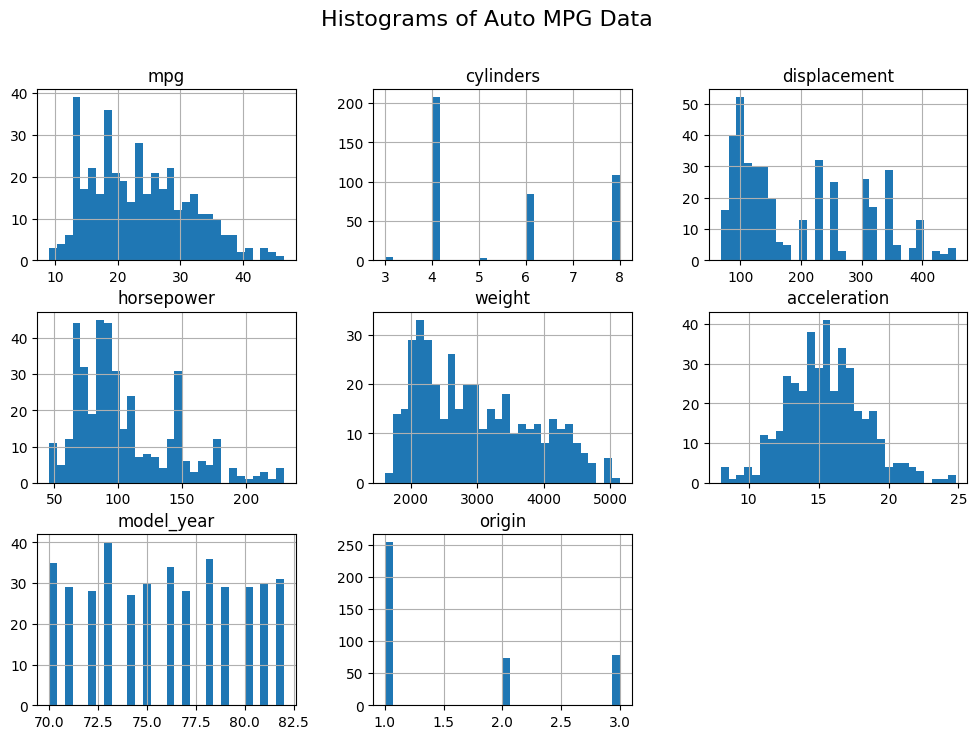

In [262]:
# 1. Histograms
df.hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Auto MPG Data", fontsize=16)
plt.show()

#### 2.1 Boxenplots

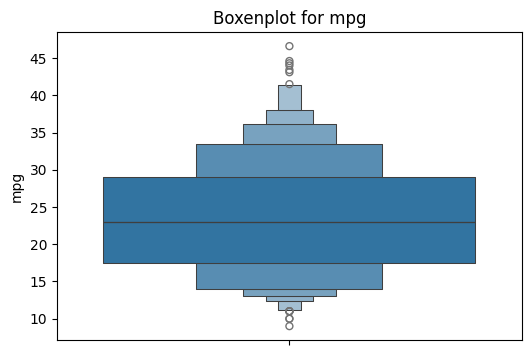

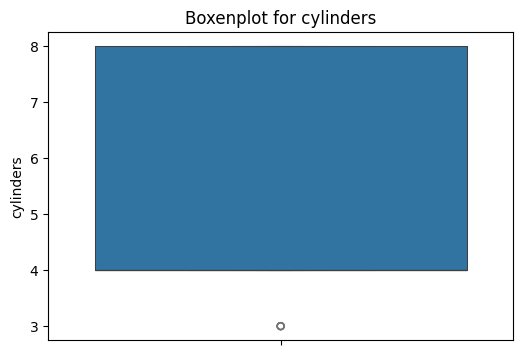

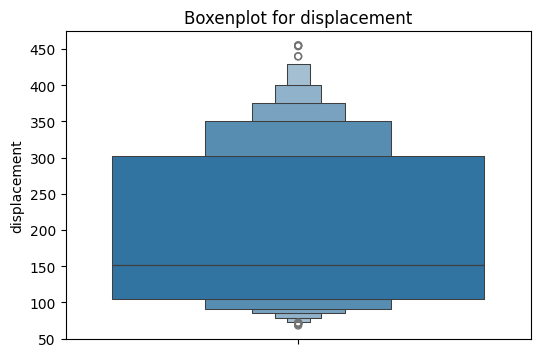

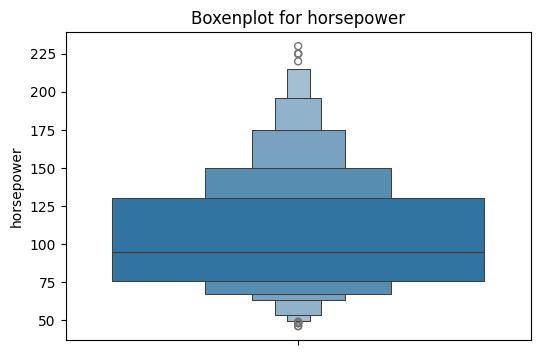

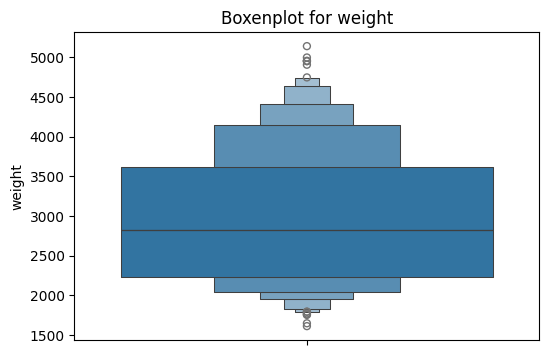

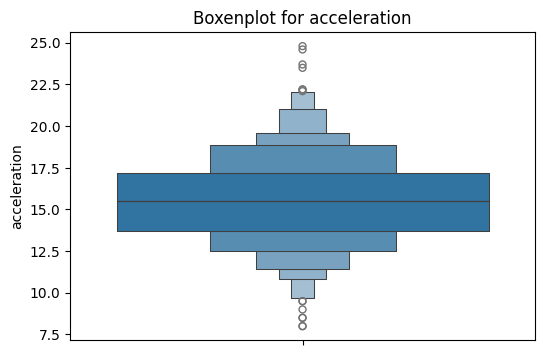

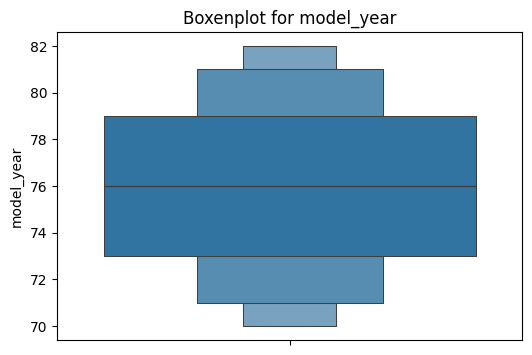

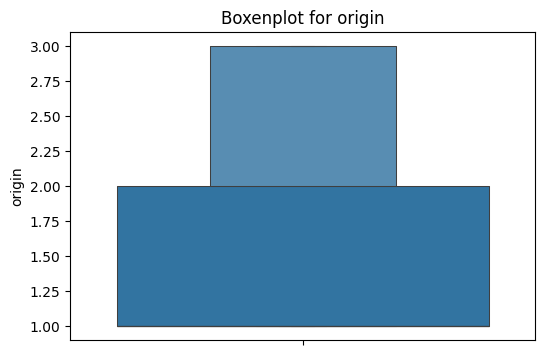

In [263]:

# 2. Boxenplots
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=df[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

#### 2.1 Correlation Heatmap

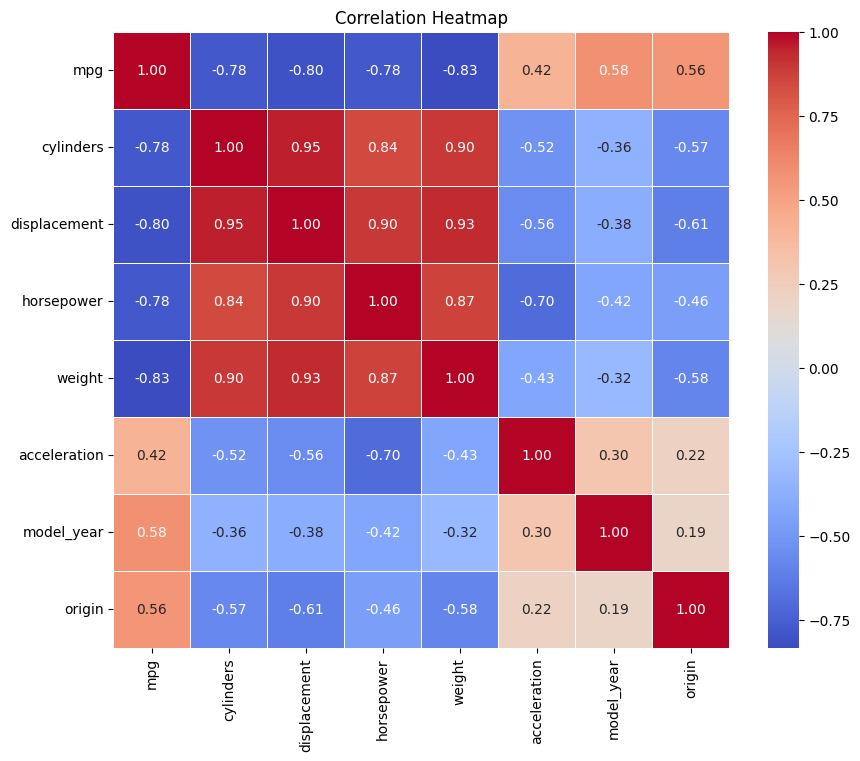

In [264]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(columns=['car_name']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### 2.1 Pairplot

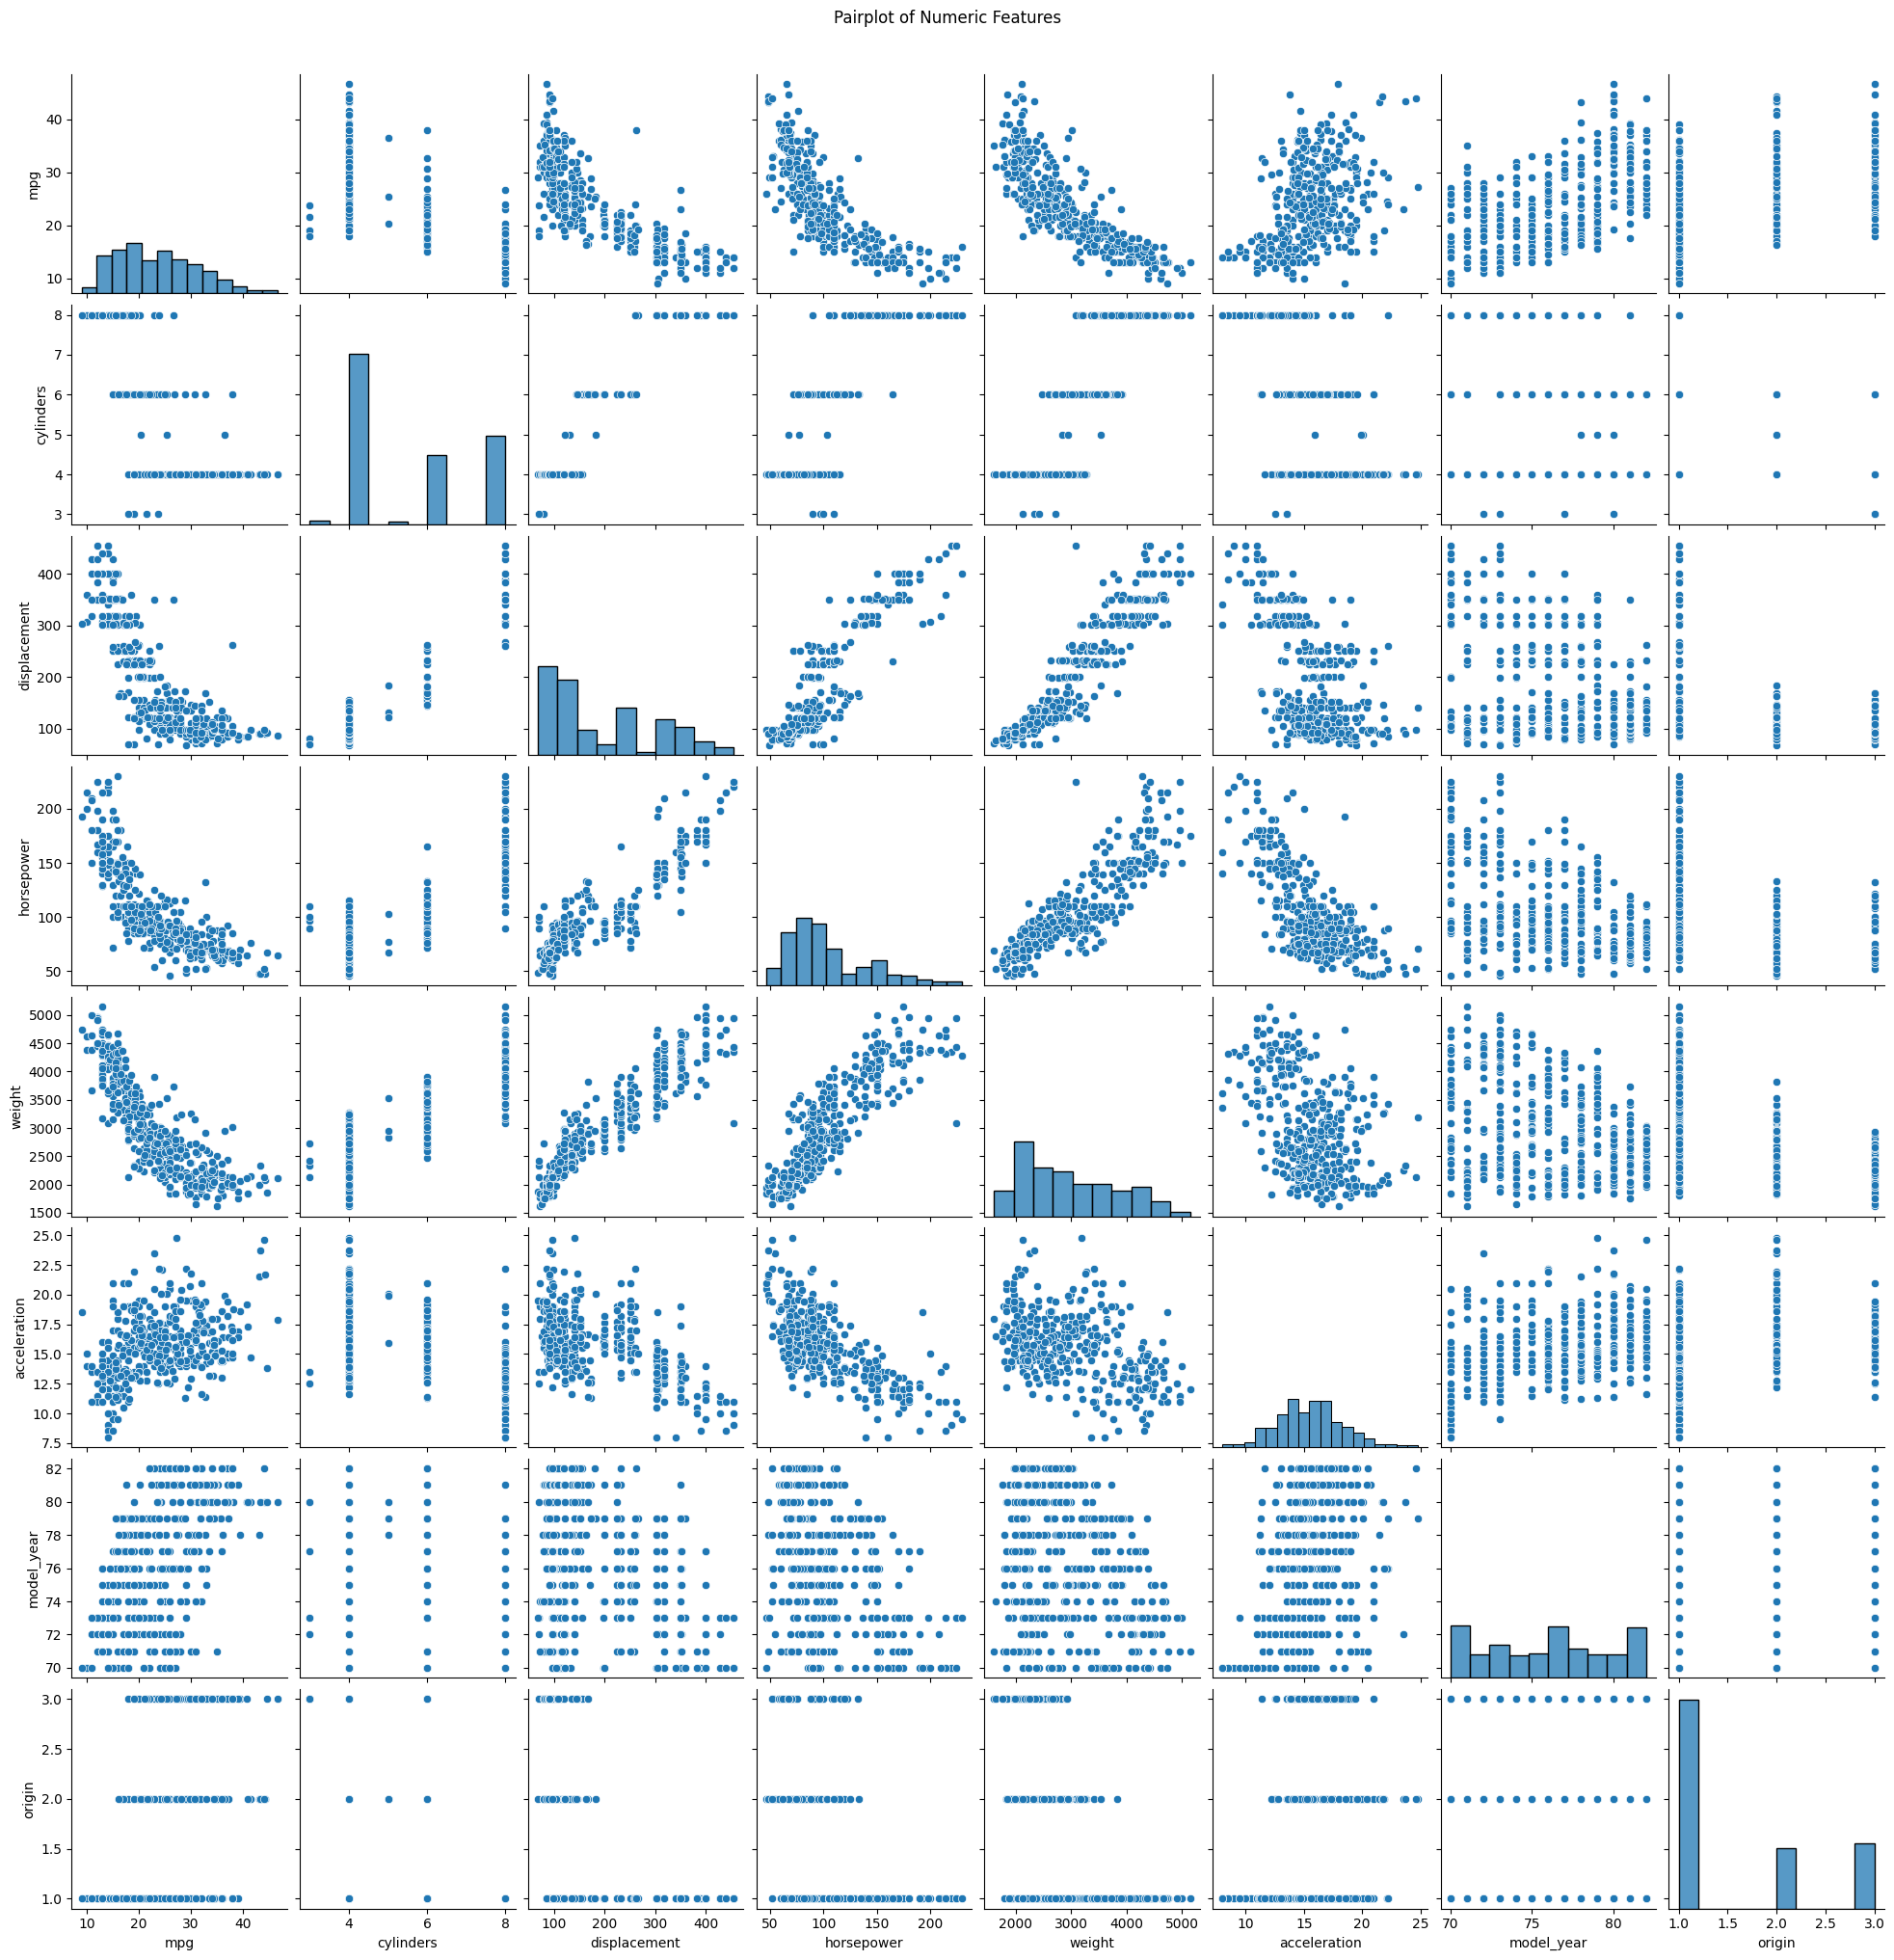

In [265]:
# 3. Pairplot (scatterplot matrix)
sns.pairplot(df)
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

#### 2.1 Scatterplot

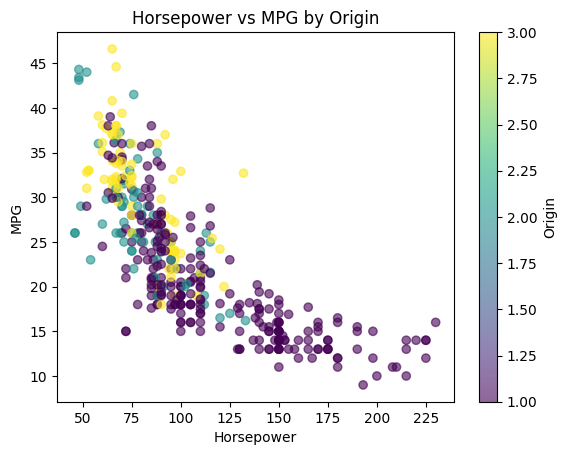

In [266]:
# 4. Scatterplot: Horsepower vs MPG by Origin
plt.scatter(df['horsepower'], df['mpg'], c=df['origin'], cmap='viridis', alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs MPG by Origin')
plt.colorbar(label='Origin')
plt.show()

#### 2.1 Histogram

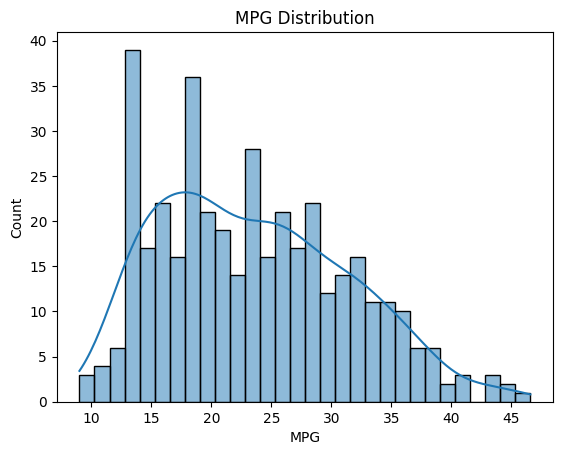

In [267]:
# 5. Histogram of MPG
sns.histplot(df['mpg'], kde=True, bins=30)
plt.title('MPG Distribution')
plt.xlabel('MPG')
plt.show()

#### 2.1 Countplot

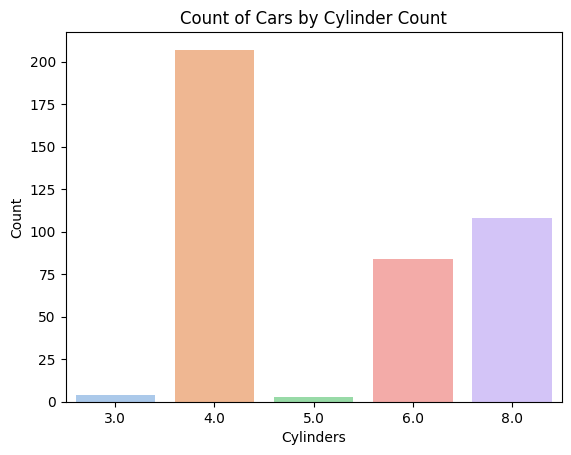

In [268]:
# 6. Countplot for cylinders
sns.countplot(x='cylinders', hue='cylinders', data=df, palette='pastel', legend=False)
plt.title('Count of Cars by Cylinder Count')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

### 2.2 Handle missing values and clean data
- Impute or drop missing values (as applicable).
- Remove or transform outliers (as applicable).
- Convert categorical data to numerical format using encoding (as applicable).

In [269]:
# Convert horsepower to numeric and handle missing values
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Drop rows with missing target values before modeling
df = df.dropna(subset=['mpg'])
print("Column names:", df.columns.tolist())

# Clean the data
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

Column names: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']


### 2.3 Feature selection and engineering
- Create new features (as applicable).
- Transform or combine existing features to improve model performance (as applicable).
- Scale or normalize data (as applicable).

In [270]:
# Add new feature
df['power_to_weight'] = df['horsepower'] / df['weight']

### Reflection 2: 
1) What patterns or anomalies do you see? 
   1) Ans: The many visualizations reveal that the largest pattern is the inverse correlation of "horsepower" + "weight" to "mpg". 
2) Do any features stand out? What preprocessing steps were necessary to clean and improve the data? 
   1) Ans: We did have to fill in missing horsepower values with median data. 
3) Did you create or modify any features to improve performance?
   1) Ans: Added 'power_to_weight' to enable a ratio of the two. 

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
    - Regression: Continuous target variable (e.g., price, temperature).
    - Classification: Categorical target variable (e.g., gender, species).
    - Clustering: No target variable.
    - Justify your selection with reasoning.


### 3.2 Define X and y
- Assign input features to X
- Assign target variable to y (as applicable)

In [271]:
# Feature sets (after splitting data into train/test)
X1 = df[['horsepower']]  # Input feature
X2 = df[['weight']]  # Input feature
X3 = df[['horsepower', 'weight']]  # Input features
X4 = df[['acceleration']]  # Input feature
y = df['mpg']  # Target variable


### Reflection of Section 3:
1) Why did you choose these features? 
   1) Ans: These were the most prominent dimensions within our dataset. 
2) How might they impact predictions or accuracy? 
   1) Ans: The correlations of these dimensions should help with meaningful predictions. 

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data
Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [272]:
# Train-test split (before scaling)
X1_train, X1_test, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=123)
X2_train, X2_test, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=123)
X3_train, X3_test, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=123)
X4_train, X4_test, y_train4, y_test4 = train_test_split(X4, y, test_size=0.2, random_state=123)

### 4.2 Train model using Scikit-Learn model.fit() method

In [273]:
# Apply StandardScaler to the feature sets (scaling after split)
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

scaler4 = StandardScaler()
X4_train_scaled = scaler4.fit_transform(X4_train)
X4_test_scaled = scaler4.transform(X4_test)

### 4.3 Evalulate performance, for example:
- Regression: R^2, MAE, RMSE (RMSE has been recently updated)
- Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
- Clustering: Inertia, Silhouette Score

In [274]:
# Train models using a function to reduce redundancy
def train_and_evaluate(X_train, X_test, y_train, y_test, label):
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Evaluation function
    print(f"\n{label}")
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
    print("MAE:", mean_absolute_error(y_test, y_pred))

# Model training and evaluation for all cases
train_and_evaluate(X1_train_scaled, X1_test_scaled, y_train1, y_test1, "Case 1: Horsepower")
train_and_evaluate(X2_train_scaled, X2_test_scaled, y_train2, y_test2, "Case 2: Weight")
train_and_evaluate(X3_train_scaled, X3_test_scaled, y_train3, y_test3, "Case 3: Horsepower + Weight")
train_and_evaluate(X4_train_scaled, X4_test_scaled, y_train4, y_test4, "Case 4: Acceleration")


Model Coefficients: [-6.09828419]
Intercept: 23.412578616352203

Case 1: Horsepower
R² Score: 0.5690781733171164
RMSE: 5.013359561648775
MAE: 3.924285868241379
Model Coefficients: [-6.54567169]
Intercept: 23.412578616352203

Case 2: Weight
R² Score: 0.6710099907257538
RMSE: 4.380472541282045
MAE: 3.5011864129785644
Model Coefficients: [-1.58769576 -5.1569835 ]
Intercept: 23.412578616352203

Case 3: Horsepower + Weight
R² Score: 0.6940724766799615
RMSE: 4.224145636002059
MAE: 3.3523923752631086
Model Coefficients: [3.41707483]
Intercept: 23.412578616352206

Case 4: Acceleration
R² Score: 0.11444118012806925
RMSE: 7.1868455879003195
MAE: 5.6882210763758305


#### 4.3 Regression Scatterplot

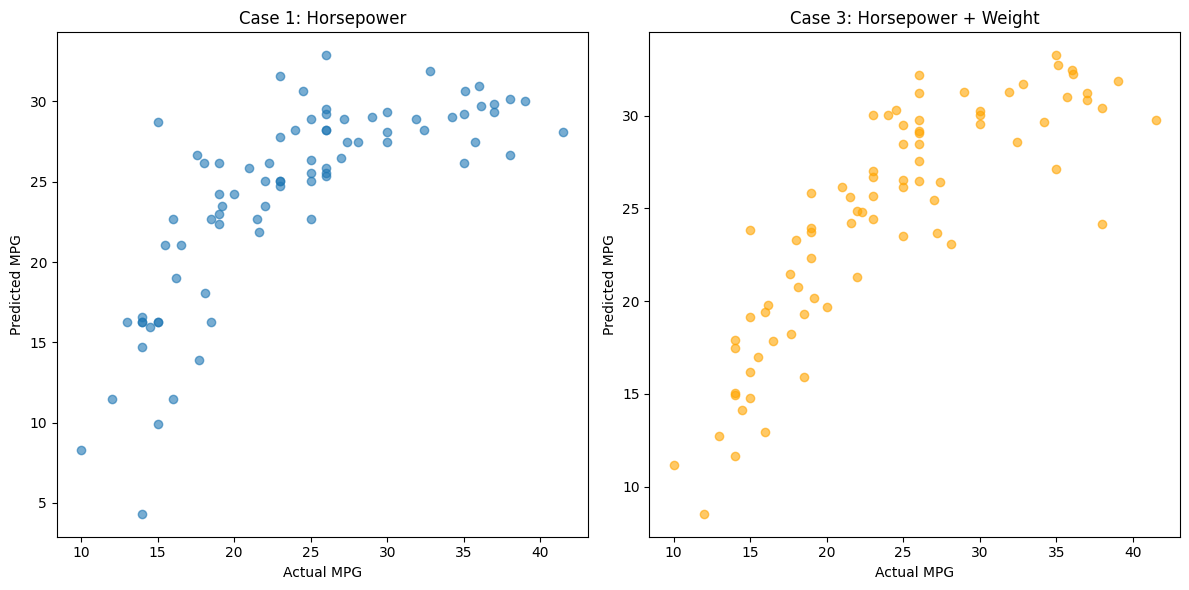

In [275]:
# Visualize regression results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test1, y_pred1, alpha=0.6)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Case 1: Horsepower")

plt.subplot(1, 2, 2)
plt.scatter(y_test3, y_pred3, alpha=0.6, color='orange')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Case 3: Horsepower + Weight")

plt.tight_layout()
plt.show()

### Reflection 4: 
1) How well did the model perform? Any surprises in the results?
   1) Ans: Our best results came from the combined test Case 3: 'Horsepower' + 'Weight'. 


### Section 5. Improve the Model or Try Alternates (Implement Pipelines)

#### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.

In [276]:
# Define the features
X = df[['horsepower', 'weight', 'acceleration']]  # Use relevant features
y = df['mpg']

# 5.1 Pipeline 1: Imputer → StandardScaler → Linear Regression
pipeline1 = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['horsepower', 'weight', 'acceleration'])
    ])),
    ('model', LinearRegression())
])

### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.

In [277]:
# 5.2 Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression
pipeline2 = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('poly', PolynomialFeatures(degree=3)),
            ('scaler', StandardScaler())
        ]), ['horsepower', 'weight', 'acceleration'])
    ])),
    ('model', LinearRegression())
])


### 5.2 Train-test Split

In [278]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 5.3 Compare performance of all models across the same performance metrics

In [ ]:
# 5.3 Compare the performance of both pipelines using cross-validation
def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print("R² Score:", r2_score(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    
# Evaluate both pipelines
print("Evaluating Pipeline 1: Imputer → StandardScaler → Linear Regression")
evaluate_pipeline(pipeline1, X_train, y_train, X_test, y_test)

print("\nEvaluating Pipeline 2: Imputer → Polynomial Features → StandardScaler → Linear Regression")
evaluate_pipeline(pipeline2, X_train, y_train, X_test, y_test)

# Optional: Compare performance using cross-validation for each pipeline
cross_val_score(pipeline1, X, y, cv=5, scoring='neg_mean_squared_error')
cross_val_score(pipeline2, X, y, cv=5, scoring='neg_mean_squared_error')

scores = cross_val_score(pipeline1, X, y, cv=5, scoring='r2')
print("Pipeline 1 CV R² Scores:", scores)
print("Mean R²:", scores.mean())

Evaluating Pipeline 1: Imputer → StandardScaler → Linear Regression
R² Score: 0.6909803778879127
RMSE: 4.245439302529334
MAE: 3.3693912441965352

Evaluating Pipeline 2: Imputer → Polynomial Features → StandardScaler → Linear Regression
R² Score: -0.7114442272030912
RMSE: 9.991046562705863
MAE: 4.108637222760679
Pipeline 1 CV R² Scores: [ 0.47464816  0.34728352  0.7587966   0.70312053 -0.6633668 ]
Mean R²: 0.32409640368061293


### Reflection 5: 
1) Which models performed better? How does scaling impact results?
   1) Ans: Overall, both of Pipeline 1 configuration performed more reliably that Pipline 2. Pipeline 1 had a very strong R2 score ensuring that it was roughly 69% accurate, however, our Pipeline 2 returned a negative R2 indicating that it likely overfit the test data. 

### Section 6. Final Thoughts & Insights

#### 6.1 Summarize Findings
1) Overall, this project and it's code executed very well. Our selected dimensions provided a good means for analysis due to their correlations to 'mpg'. Our model training performed well and implementing 'scaling' helped strengthen the consistency of the models. There are many helpful visualizations should one want to delve into each variable. Our closing analysis finds that there is indeed a strong relationship of 'horsepower' + 'weight' to 'mpg' results. Generally, the heavier the car and more horsepower it has, the poorer it's fuel efficiency.

#### 6.2 Discuss Challenges 
1) Technical: Our Pipeline 2 configuration was severely overfit, this rendered it essentially useless for our analysis. Be it a finding in it's own, further work would be needed to make it a useful addition.
2) Project: There were a handful of minor iterations to get our complete codeset working perfectly. Overall, nothing too extreme. 

#### 6.3 If you had more time, what would you try next?
1) Fix or adjust the codeset and/or data to exercise more variations like in Pipeline 2. 
2) Combine or further optimize certain visuals.

#### Reflection 6: What did you learn from this project?
1) In sum this was a great project and learning exercise. It did well to require the incorporation of our various lessons across the course. 